In [2]:
import numpy as np
import matplotlib.pyplot as plt
import uproot
import awkward as ak
import os
import scipy.optimize as sc
import glob
from matplotlib.ticker import MultipleLocator
import subprocess
from scipy.optimize import curve_fit
from scipy.stats import chi2


In [3]:
setup_path ="/home/haue/repositories/Masters/setup/" 
data_path = "/home/haue/repositories/Masters/data/singleprotons/Al/inclbetacut/"
twop_path = "/home/haue/repositories/Masters/data/twoproton/Al/"
Al_files = glob.glob(os.path.join(data_path, "*mlio.root"))
twop_files = glob.glob(os.path.join(twop_path, "*mlio.root"))
frac = 0.9542011788469517 # (Na21/(p+Na21)) amount of energy the daughter nucleus gets of the total energy released in the decay
frac_err = 1.032071836027589e-10 # uncertainty of the fraction
mp  = 1007825.031898
mNa = 20997654.459
mNe = 19992440.17525
S1p = 5504.1000
S2p = 7935.9963
QB  = 17600

def y1(x, E1):
    return E1 + 0*x
def y2(x, E1, E2): # E1 may be fixed
    M = mp/mNa
    return E2 - 2*M*np.sqrt(E1*E2)*x + E1*M**2

def q2p(E1, Q2):
    massfrac = (mNa+mp)/mNa
    return massfrac * E1 +Q2

In [4]:
EE2p = np.array([])
E1 = np.array([])
E2 = np.array([])
Q2p = np.array([])
theta = np.array([])
for batch in uproot.iterate(twop_files, expressions=["E", "E1", "E2", "Q2p", "Theta"],
                            cut="Q2p>0"):
    EE2p=np.append(EE2p, ak.flatten(batch.E))
    E1=np.append(E1, batch.E1)
    E2=np.append(E2, batch.E2)
    Q2p=np.append(Q2p, batch.Q2p)
    theta=np.append(theta, batch.Theta)


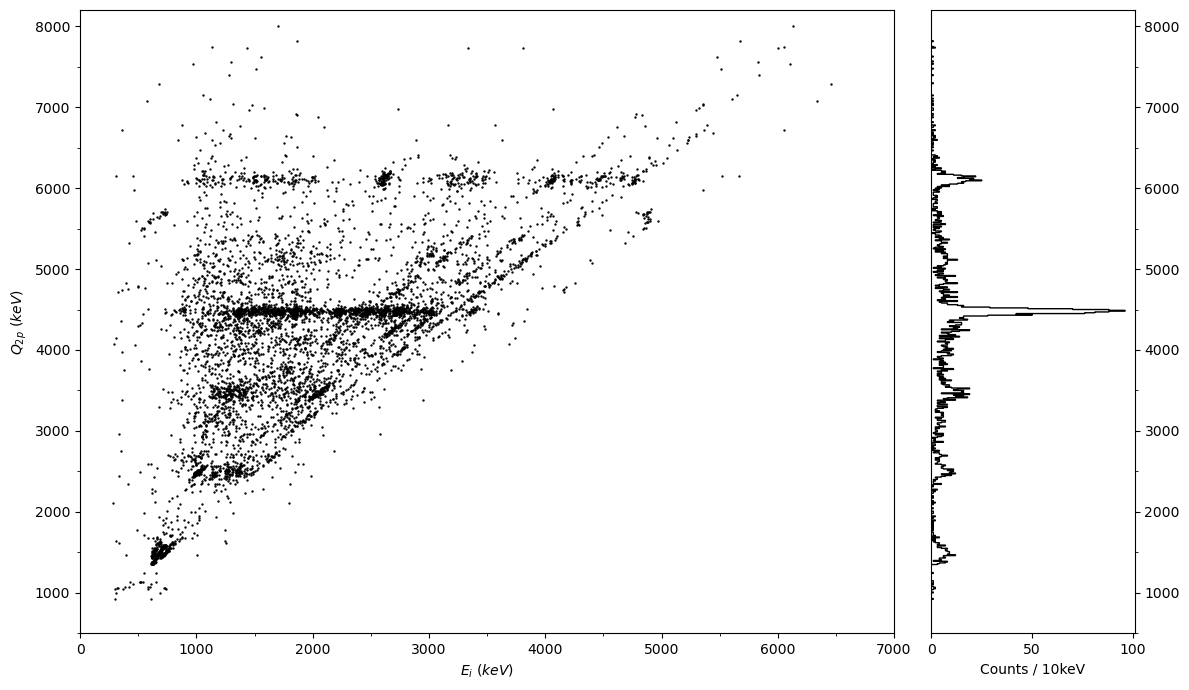

In [50]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12,7), sharey=True,gridspec_kw={'width_ratios':[4,1]})
ax1.scatter(E1,Q2p, color='k', s=0.5)
ax1.scatter(E2,Q2p, color='k', s=0.5)
ax1.set_xlabel(r"$E_i \ (keV)$")
ax1.set_ylabel(r"$Q_{2p} \ (keV)$")
ax1.set_xticks(np.arange(0,7000, 500), minor=True)
ax1.set_xlim(0,7000)
ax1.set_yticks(np.arange(500,8000,500), minor=True)
ax1.set_ylim(500,8200)

ax2.hist(Q2p, bins=np.arange(500,8000+10,10), histtype='step',orientation='horizontal', color='k')
ax2.set_xlabel("Counts / 10keV")
ax2.yaxis.set_ticks_position('right')

#lims = (6000,6230) lims = (4350,4580)
#visualization of fitting function
#es = np.linspace(1000,4000)
#ax1.plot(es,q2p(es,900), ls='--', color='r')


fig.subplots_adjust(wspace=0.1, left=0.08, right=0.95, top=0.9, bottom=0.1)
plt.tight_layout()

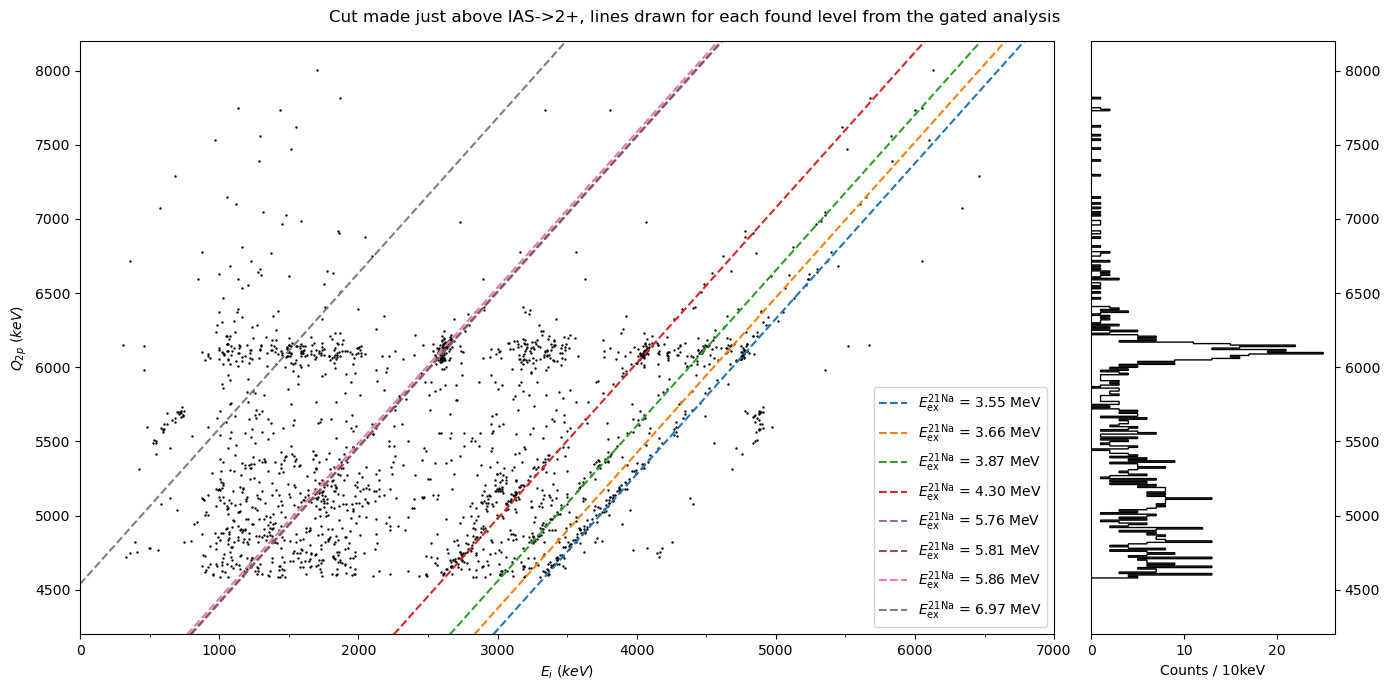

In [51]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(14,7), sharey=True,gridspec_kw={'width_ratios':[4,1]})
mask = (Q2p>4580)
ax1.scatter(E1[mask],Q2p[mask], color='k', s=0.5)
ax1.scatter(E2[mask],Q2p[mask], color='k', s=0.5)
ax1.set_xlabel(r"$E_i \ (keV)$")
ax1.set_ylabel(r"$Q_{2p} \ (keV)$")
ax1.set_xticks(np.arange(0,7000, 500), minor=True)
ax1.set_xlim(0,7000)
ax1.set_yticks(np.arange(500,8000,500), minor=True)
ax1.set_ylim(4200,8200)

ax2.hist(Q2p[mask], bins=np.arange(500,8000+10,10), histtype='step',orientation='horizontal', color='k')
ax2.set_xlabel("Counts / 10keV")
ax2.yaxis.set_ticks_position('right')

#lims = (6000,6230) lims = (4350,4580)
ex0 = np.array([5811., 4297., 3550., 5762., 6975., 5858. ,3870.,3662.])
E2s0 = np.array([3207., 1748., 1035. ,3201. ,4321. ,3230., 1346. ,1171.])

sort_idx = np.argsort(ex0)
ex0_sorted  = ex0[sort_idx]
E2s0_sorted = E2s0[sort_idx]
Q2p_0 = np.array(E2s0_sorted)*(mNe + mp)/mNe

es = np.linspace(0,8000,10000)
for q,e in zip(Q2p_0,ex0_sorted):
    ax1.plot(es, q2p(es,q), ls='--',label = rf"$E_{{\mathrm{{ex}}}}^{{21\mathrm{{Na}}}}$ = {e/1e3:.2f} MeV")

ax1.legend(loc='lower right')
fig.subplots_adjust(wspace=0.1, left=0.08, right=0.95, top=0.9, bottom=0.1)
fig.suptitle(f"Cut made just above IAS->2+, lines drawn for each found level from the gated analysis")
plt.tight_layout()


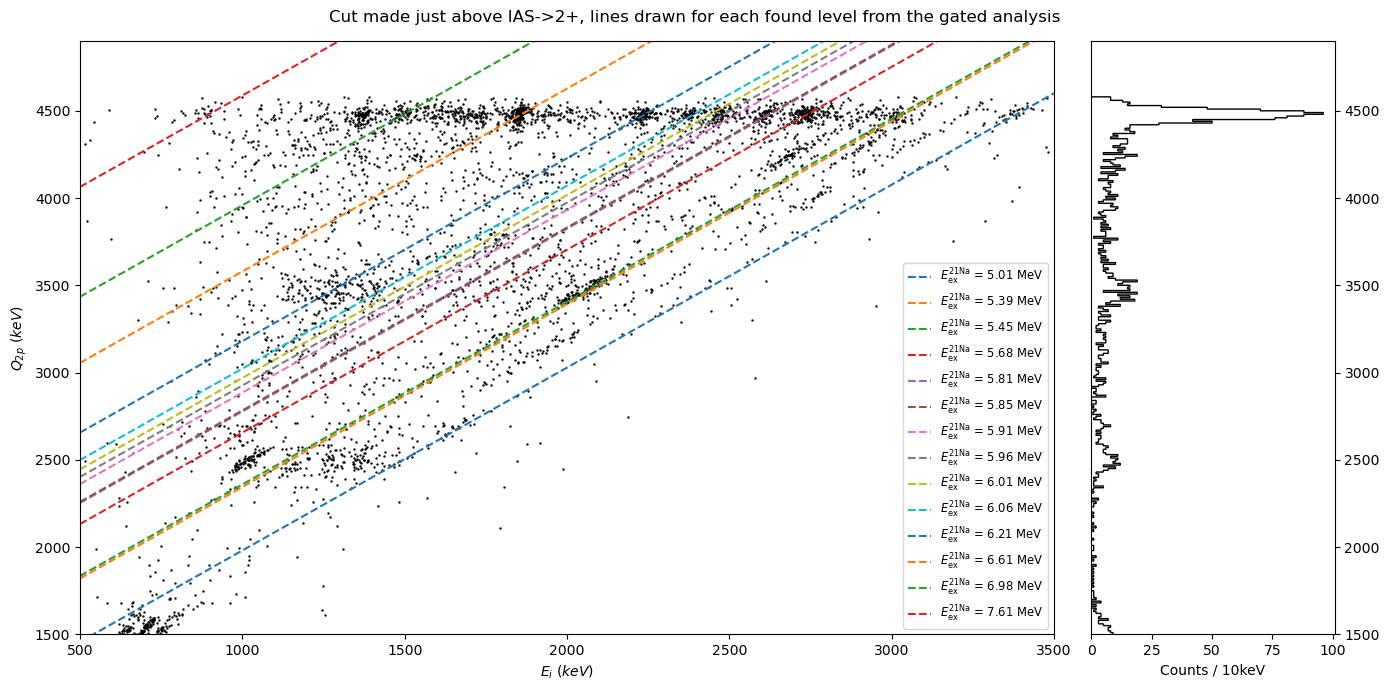

In [54]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(14,7), sharey=True,gridspec_kw={'width_ratios':[4,1]})
mask = (Q2p<4580)
ax1.scatter(E1[mask],Q2p[mask], color='k', s=0.5)
ax1.scatter(E2[mask],Q2p[mask], color='k', s=0.5)
ax1.set_xlabel(r"$E_i \ (keV)$")
ax1.set_ylabel(r"$Q_{2p} \ (keV)$")
ax1.set_xticks(np.arange(0,7000, 500), minor=True)
ax1.set_xlim(500,3500)
ax1.set_yticks(np.arange(500,8000,500), minor=True)
ax1.set_ylim(1500,4900)

ax2.hist(Q2p[mask], bins=np.arange(500,8000+10,10), histtype='step',orientation='horizontal', color='k')
ax2.set_xlabel("Counts / 10keV")
ax2.yaxis.set_ticks_position('right')

#lims = (6000,6230) lims = (4350,4580)
E2s2 = np.array([2410., 1531., 2030., 1646., 1788., 1234., 2771., 1880.,3370.,1749. ,1248., 1829. ,1652., 888.])
ex2 = np.array([6606. ,5683. ,6212. ,5809., 5957., 5388., 6978., 6060., 7608., 5907., 5445., 6007. ,5851. ,5011.])



sort_idx = np.argsort(ex2)
ex2_sorted  = ex2[sort_idx]
E2s2_sorted = E2s2[sort_idx]
Q2p_2 = np.array(E2s2_sorted)*(mNe + mp)/mNe

es = np.linspace(0,8000,10000)
for q,e in zip(Q2p_2,ex2_sorted):
    ax1.plot(es, q2p(es,q), ls='--', label = rf"$E_{{\mathrm{{ex}}}}^{{21\mathrm{{Na}}}}$ = {e/1e3:.2f} MeV")
ax1.legend(loc='lower right', fontsize='small')
fig.suptitle("Cut made just above IAS->2+, lines drawn for each found level from the gated analysis")
fig.subplots_adjust(wspace=0.1, left=0.08, right=0.95, top=0.9, bottom=0.1)
plt.tight_layout()